In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('globallandslides.csv')

In [9]:
copy = pd.read_csv('globallandslides.csv')

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
dataset.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [12]:
dataset["Year"] = pd.to_datetime(dataset["event_date"]).dt.year

In [13]:
dataset.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,Year
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625,2008
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200,2009
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295,2007
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378,2009
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336,2010


In [14]:
newdf = dataset[dataset.country_name=="India"]

In [15]:
newdf.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,Year
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1055,07/22/2009 12:00:00 AM,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1055.0,India,IN,Bengal,46427.0,Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600,2009
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1054,07/22/2009 12:00:00 AM,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1054.0,India,IN,Bengal,46427.0,Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200,2009
45,Telegraph India,https://www.telegraphindia.com/1090707/jsp/sil...,1061,07/01/2009 05:40:00 AM,NaN,Bridge destroyed at 4th Mile,Landslides triggered by heavy rains hit an iro...,"4th Mile, Lower Mangshila in North Sikkim",1km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,"Original source is unknown, but it appears to ...",glc,1061.0,India,IN,NaN,1464.0,Mangan,3.54100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.527000,27.478000,2009
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,2164,07/29/2010 11:00:00 PM,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,2164.0,India,IN,Manipur,15118.0,Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863,2010
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,3821,07/21/2011 12:00:00 AM,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,rain,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,3821.0,India,IN,Uttarakhand,32442.0,Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400,2011


In [16]:
newdf.groupby(['Year']).country_name.count()

Year
2007     73
2008     57
2009     52
2010    244
2011    156
2012     79
2013    204
2014     83
2015    216
2016    101
Name: country_name, dtype: int64

In [17]:
y_values = newdf.groupby(['Year']).country_name.count().values

In [18]:
y_values.tolist()

[73, 57, 52, 244, 156, 79, 204, 83, 216, 101]

In [19]:
z = newdf.groupby(['Year']).country_name.count()

In [20]:
z.index.values

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [21]:
x_values = z.index.values.tolist()

In [22]:
x_values

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

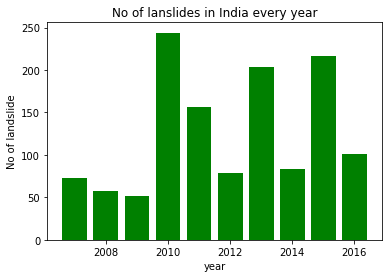

In [23]:
plt.bar(x_values,y_values, color = "green")
plt.xlabel("year")
plt.ylabel("No of landslide")
plt.title("No of lanslides in India every year")
plt.show()


#**Map**

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
newdf_copy = dataset[dataset.country_name=="India"]

In [27]:
newdf = newdf_copy

In [28]:
newdf = newdf.dropna(axis=0, subset=['admin_division_name'])

In [29]:
newdf

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude,Year
32,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1055,07/22/2009 12:00:00 AM,NaN,"Kerseong, West Bengal",The disruption of popular toy train services i...,"Kerseong, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1055.0,India,IN,Bengal,46427.0,Kārsiyāng,0.15035,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.278800,26.882600,2009
34,One India,https://www.oneindia.com/2009/07/23/darjeeling...,1054,07/22/2009 12:00:00 AM,NaN,"Gayabari, West Bengal",The disruption of popular toy train services i...,"Gayabari, West Bengal",10km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,1054.0,India,IN,Bengal,46427.0,Kārsiyāng,4.62496,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.314300,26.857200,2009
59,E-Pao,http://www.e-pao.net/GP.asp?src=28..210810.aug10,2164,07/29/2010 11:00:00 PM,NaN,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",Since the Chingai-Quingai road has been sunk d...,"Chingai-Kuingai(Quingai) route (16 kms), Ching...",25km,landslide,downpour,medium,unknown,0.0,NaN,NaN,NaN,NaN,glc,2164.0,India,IN,Manipur,15118.0,Phek,39.51186,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,94.482147,25.309863,2010
62,ibnlive.in,http://ibnlive.in.com/generalnewsfeed/news/two...,3821,07/21/2011 12:00:00 AM,NaN,"Kumaon, Uttarakhand","Dehradun, July 21 (PTI) Two persons were kille...","Kumaon, Uttarakhand",25km,landslide,rain,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,3821.0,India,IN,Uttarakhand,32442.0,Almora,15.27100,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,79.636700,29.733400,2011
66,Tribune India.com,NaN,37,03/19/2007 12:00:00 AM,NaN,Doba,"2 killed, 5 injured",Doba,25km,landslide,rain,medium,unknown,2.0,NaN,NaN,NaN,NaN,glc,37.0,India,IN,Kashmir,14711.0,Kupwāra,18.10887,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,74.333300,33.877800,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,headlinesindia,http://www.headlinesindia.com/natural-disaster...,1030,05/26/2009 12:00:00 AM,NaN,"Darjeeling Sadar, Darjeeling West Bengal","With the recovery of three more bodies, the to...","Darjeeling Sadar, Darjeeling West Bengal",25km,landslide,tropical_cyclone,medium,unknown,14.0,NaN,Cyclone Aila,NaN,NaN,glc,1030.0,India,IN,Bengal,123797.0,Dārjiling,0.79891,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,88.265221,27.043571,2009
9852,www.greaterkashmir.com,http://www.greaterkashmir.com/news/2013/Jun/12...,4913,06/11/2013 11:00:00 PM,NaN,"Srinagar-Jammu Highway, Ramban District",While pre-monsoon showers brought much needed ...,"Srinagar-Jammu Highway, Ramban District",unknown,landslide,rain,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,4913.0,India,IN,Himachal Pradesh,6690.0,Ghumārwīn,6.68727,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,76.670200,31.488100,2013
9859,The Times of India,http://timesofindia.indiatimes.com/city/dehrad...,7294,07/24/2015 12:00:00 AM,NaN,Kempty Road near Kempty Falls,"two more landslides occurred since Friday, one...",Kempty Road near Kempty Falls,25km,landslide,continuous_rain,small,above_road,0.0,0.0,NaN,NaN,NaN,glc,7294.0,India,IN,Uttarakhand,25753.0,Mussoorie,15.12471,07/29/2015 06:47:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,78.104500,30.452800,2015
9865,ibnlive.in,http://ibnlive.in.com/news/crops-worth-rs-185-...,3566,06/02/2011 12:00:00 AM,NaN,"Munnar, Id

In [30]:
newdf["admin_division_name"].replace("Nāgāland", "Nagaland",inplace = True)
newdf["admin_division_name"].replace("Meghālaya", "Meghalaya",inplace = True)
newdf["admin_division_name"].replace("Tamil Nādu", "Tamil Nadu",inplace = True)
newdf["admin_division_name"].replace("Karnātaka", "Karnataka",inplace = True)
newdf["admin_division_name"].replace("Gujarāt", "Gujarat",inplace = True)
newdf["admin_division_name"].replace("Arunāchal Pradesh", "Arunachal Pradesh",inplace = True)


C:\Users\USER\anaconda3\envs\landslide\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [46]:
statedf = newdf["admin_division_name"].value_counts()

In [47]:
statedf

Kashmir                        204
Uttarakhand                    189
Himachal Pradesh               153
Assam                           82
Nagaland                        78
Maharashtra                     70
Manipur                         56
Kerala                          50
Bengal                          47
Arunachal Pradesh               45
Tamil Nadu                      40
Sikkim                          31
Karnataka                       31
Meghalaya                       29
West Bengal                     27
Mizoram                         27
Goa                             22
Andhra Pradesh                  21
Odisha                           6
Rajasthan                        6
Uttar Pradesh                    5
Haryana                          4
NCT                              4
Jharkhand                        3
Bihar                            3
Tripura                          3
Orissa                           3
Gujarat                          2
Madhya Pradesh      

In [48]:
statedf.head()

Kashmir             204
Uttarakhand         189
Himachal Pradesh    153
Assam                82
Nagaland             78
Name: admin_division_name, dtype: int64

In [49]:
statedf = statedf.to_frame()

In [50]:
statedf

,admin_division_name
Kashmir,204
Uttarakhand,189
Himachal Pradesh,153
Assam,82
Nagaland,78
Maharashtra,70
Manipur,56
Kerala,50
Bengal,47
Arunachal Pradesh,45


In [51]:
statedf.reset_index(level=0, inplace=True)

In [52]:
statedf

,index,admin_division_name
0,Kashmir,204
1,Uttarakhand,189
2,Himachal Pradesh,153
3,Assam,82
4,Nagaland,78
5,Maharashtra,70
6,Manipur,56
7,Kerala,50
8,Bengal,47
9,Arunachal Pradesh,45


In [53]:
statedf.columns = ['State', 'Count']

In [54]:
statedf

,State,Count
0,Kashmir,204
1,Uttarakhand,189
2,Himachal Pradesh,153
3,Assam,82
4,Nagaland,78
5,Maharashtra,70
6,Manipur,56
7,Kerala,50
8,Bengal,47
9,Arunachal Pradesh,45


In [55]:
statedf.at[18,"Count"] = 7

In [56]:
statedf.drop(31)

,State,Count
0,Kashmir,204
1,Uttarakhand,189
2,Himachal Pradesh,153
3,Assam,82
4,Nagaland,78
5,Maharashtra,70
6,Manipur,56
7,Kerala,50
8,Bengal,47
9,Arunachal Pradesh,45


In [57]:
sns.set_style('whitegrid')

In [58]:
fp = r'Maps_with_python\india-polygon.shp'
map_df = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [60]:
#Merging the data
merged = map_df.set_index('st_nm').join(statedf.set_index('State'))
merged.head()

,id,geometry,Count
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",1.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",45.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",82.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",3.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",NaN


In [62]:
merged

,id,geometry,Count
st_nm,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",1.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",45.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",82.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",3.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",NaN
Chhattisgarh,None,"POLYGON ((83.94694 23.62196, 83.95594 23.62406...",NaN
Dadra and Nagar Haveli,None,"POLYGON ((73.20640 20.12165, 73.20865 20.10695...",NaN
Daman and Diu,None,"POLYGON ((72.80144 20.37378, 72.84418 20.47463...",NaN
Goa,None,"POLYGON ((74.11982 15.65278, 74.24806 15.65698...",22.0


<AxesSubplot:title={'center':'Landslides'}>

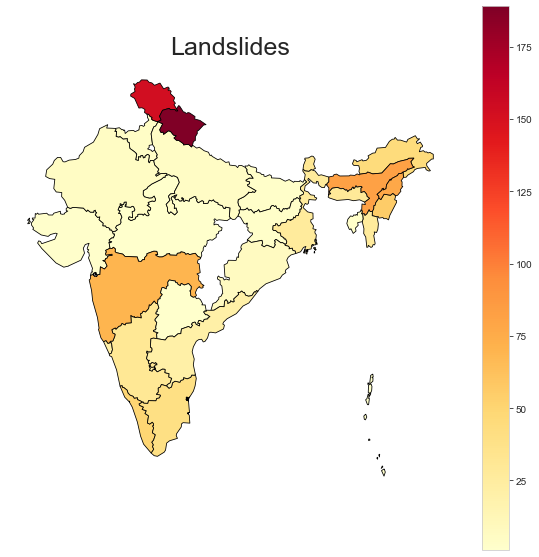

In [61]:
#create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Landslides', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [72]:
map_df = map_df[map_df.st_nm == "Delhi"]

In [68]:
from shapely.geometry import Point

                    geometry
0  POINT (77.28854 28.68779)
1  POINT (77.23193 28.66386)
2  POINT (77.19877 28.64829)
3  POINT (77.27504 28.54292)


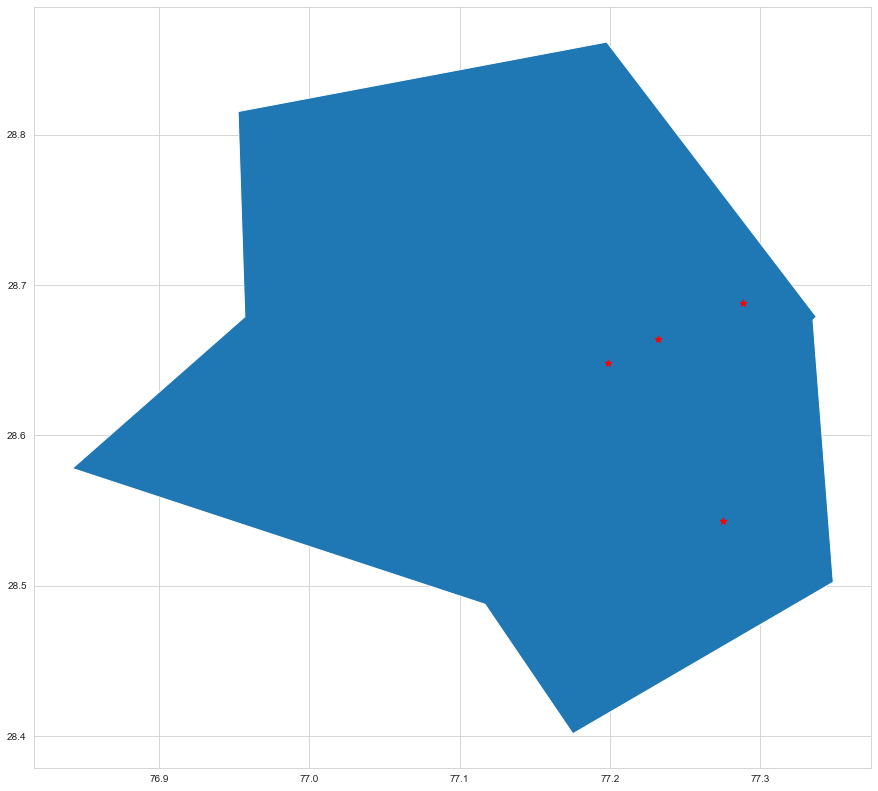

In [74]:
long =[77.2885437011719, 77.231931, 77.198767, 77.2750396728516]
lat = [28.6877899169922, 28.663863, 28.648287, 28.5429172515869]
geometry = [Point(xy) for xy in zip(long,lat)]

fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Delhi')
plt.show()